In [131]:
from sympy import Symbol,solve
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats
%matplotlib inline
r_m=76.2
beta_T=0.82
h_0=2.46
c=1
x_f=26.6
beta_f=0.28
q_f=0.83
A=3.55
beta_g=beta_f
x_g=x_f
p=10
N=50

In [132]:
#Firing rate pattern
xi_pattern=np.random.normal(0,1,size=(p,N))
r_pattern=r_m/(1+np.exp(-beta_T*(xi_pattern-h_0)))
print(r_pattern)

[[ 1.48929465 28.10222363 19.62922038 15.37101014  5.99627459 14.42007608
   5.1049612   5.64731739  8.58408337  3.86199685 12.97534892  3.28540259
  15.85850277  7.8800571  16.33844206  3.52350903 16.90693082 12.8907069
   5.10239401  4.26768607 13.51986039 12.69439082  5.09171555 26.63834685
   3.73429218  4.21738837  8.23123859 11.25191343 34.84672512 14.98568244
   6.5720917   3.65275083  9.46525816 16.10298099 11.34512981  6.5295017
   5.65343698 14.43199786  3.98990016 12.39951568 14.91592255  5.99811968
  15.283449    7.53342908 20.50632796 19.34511527  5.50748144  5.83996318
   7.07548346 20.23108338]
 [10.35550052 13.57059769 10.44657005  8.20648571 15.86333448 10.88665677
   6.05552415  7.45969451  5.18339148  4.91131626  6.58463088  3.19869324
   9.74878013  9.57698707 18.03290391  7.09503311 43.98618243  4.95716584
   8.30001061 16.31443967 13.86926343  6.43479348  4.32542516 12.01359152
  39.78921803 19.60176614  6.52467477 14.21475369  7.94342951  2.62522616
   1.71809829

In [133]:
# Structral connectivity matrix
C=np.zeros((N,N),dtype='int8')
for i in range(N):
    for j in range(N):
        if random.uniform(0,1)<c:
                C[i,j]=1

In [134]:
q_g=0.99
def f(r):
    return 0.5*(2*q_f-1+np.tanh(beta_f*(r-x_f)))
def g(r):
    return 0.5*(2*q_g-1+np.tanh(beta_g*(r-x_g)))
def phi(xi):
    return r_m/(1+np.exp(-beta_T*(xi-h_0)))

In [135]:
#equation 2
J=np.zeros((N,N))
Sum=np.zeros((N,N))
for k in range(p):
    Sum=Sum+np.dot(f(np.transpose(r_pattern[k])).reshape(N,1),g(r_pattern[k]).reshape(1,N))
J=A*C/c/N*Sum
J=np.random.normal(0,1,size=(N,N))*C
#J=J-np.transpose(J)
for i in range(N):
    J[i,i]=0
print(J)


[[ 0.          0.33419641  0.23805626 ...  0.40863473 -0.78364943
  -0.37325505]
 [ 0.60299732  0.         -1.5400738  ...  0.2785198   0.40967913
  -0.59791899]
 [-0.63891574  1.63518805  0.         ... -0.54661009  0.12738751
  -0.42175132]
 ...
 [ 0.11553396  2.01451187  0.92522405 ...  0.         -1.0255493
  -1.00077868]
 [-0.37924763 -1.12649155 -0.41241683 ... -0.21619957  0.
  -0.00867207]
 [-0.20213924  0.35750813 -0.26990987 ... -0.25265047 -2.30796999
   0.        ]]


In [136]:
# initial firing rate
r0=np.random.uniform(0,5,N)
#for i in range(p):
#    for j in range(N):
#        r0[j]=np.random.normal(r_pattern[i,j],1)
print(r0)

[1.80444116 4.00449443 0.84961799 3.33280908 2.87649029 1.11480952
 1.60390085 1.02604295 3.96302617 2.84071182 1.04482652 4.40003673
 3.40534282 4.16988436 1.64441243 4.2033462  2.40250312 0.53542257
 4.28779087 2.8545123  3.12973083 2.45937125 1.13611506 0.04963228
 2.87787268 1.76731517 2.0842422  2.58800185 2.18001044 0.75061048
 1.66380801 3.7637724  4.85937672 4.19139481 4.06883267 4.25462672
 0.10678225 4.03159552 1.15884779 1.41704813 1.05448075 0.21365878
 4.48247901 2.31761217 3.97775558 1.28351344 0.97602941 3.8860541
 0.22974227 2.55238502]


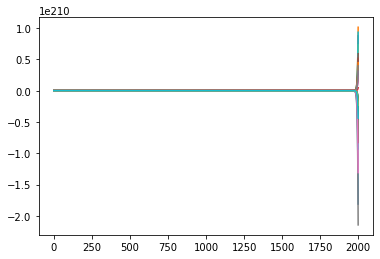

In [137]:
t_p=1000
t_max=2500+t_p
r=np.zeros((N,t_max))
tau=20
t_pre=1000+t_p
t_delay=1500+t_p
dt=1
I0=1
r[:,0]=r0
I=I0*xi_pattern[0]
for t in range(1,t_pre):
    r[:,t]=r[:,t-1]+1/tau*(-r[:,t-1]+np.dot(J,r[:,t-1])+I)
plt.figure()
for i in range(30):
    plt.plot(range(t_pre),r[i,:t_pre])